# Additional exploratory analysis for epithileal cellt yping

This notebook performs addtional EDA on the data to refine the analysis.

## 0. Initializations

In [1]:
## 0. Initializations
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-07-27 21:29:24,691 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-27 21:29:24,793 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-27 21:29:24,958 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-27 21:29:25,019 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-27 21:29:25,177 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

## 1. Tuning parameters for "Noise" cell clustering

In [3]:
_, all_noise = gse.get_combined_epithilial_dataset(apply_tsne=False)

2025-07-27 21:29:30,526 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


### 1.a. `n_neighbors`

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:408: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution, random_state=self.random_seed)
2025-07-27 21:29:38,342 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:29:38,348 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 21:29:59,032 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
C:

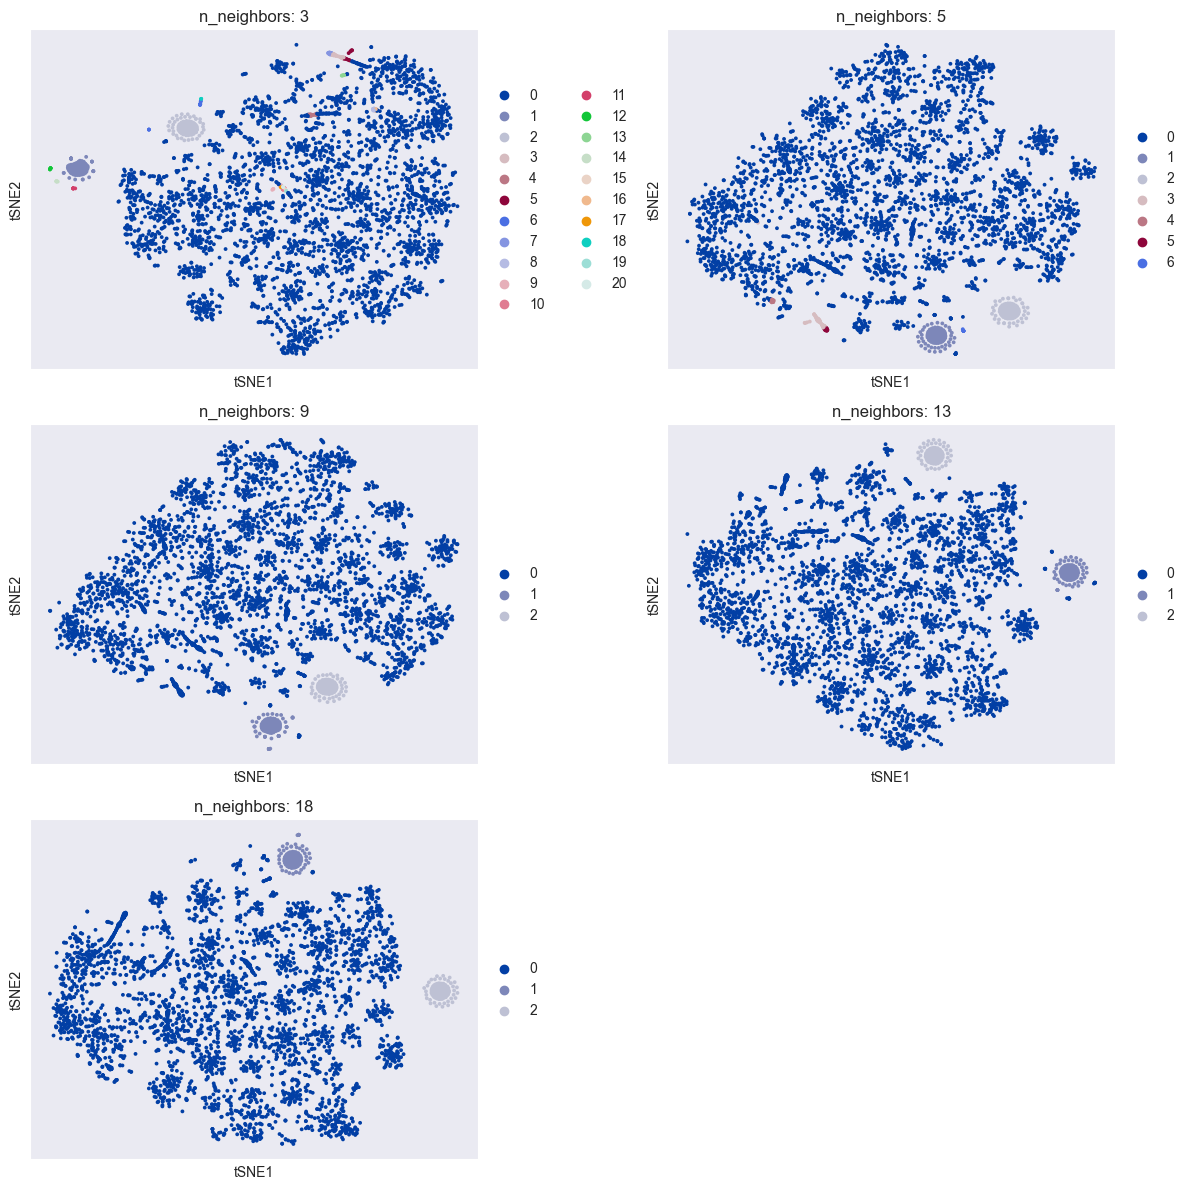

In [4]:
tuning_values = [3, 5, 9, 13, 18]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.apply_tsne(all_noise, n_neighbors=value)
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"n_neighbors: {value}",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

### 1.b. `n_pcs`

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:37:06,422 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:37:06,423 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 21:37:21,886 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:38:34,294 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:38:34,296 [INFO] openTSNE.tsne: Automa

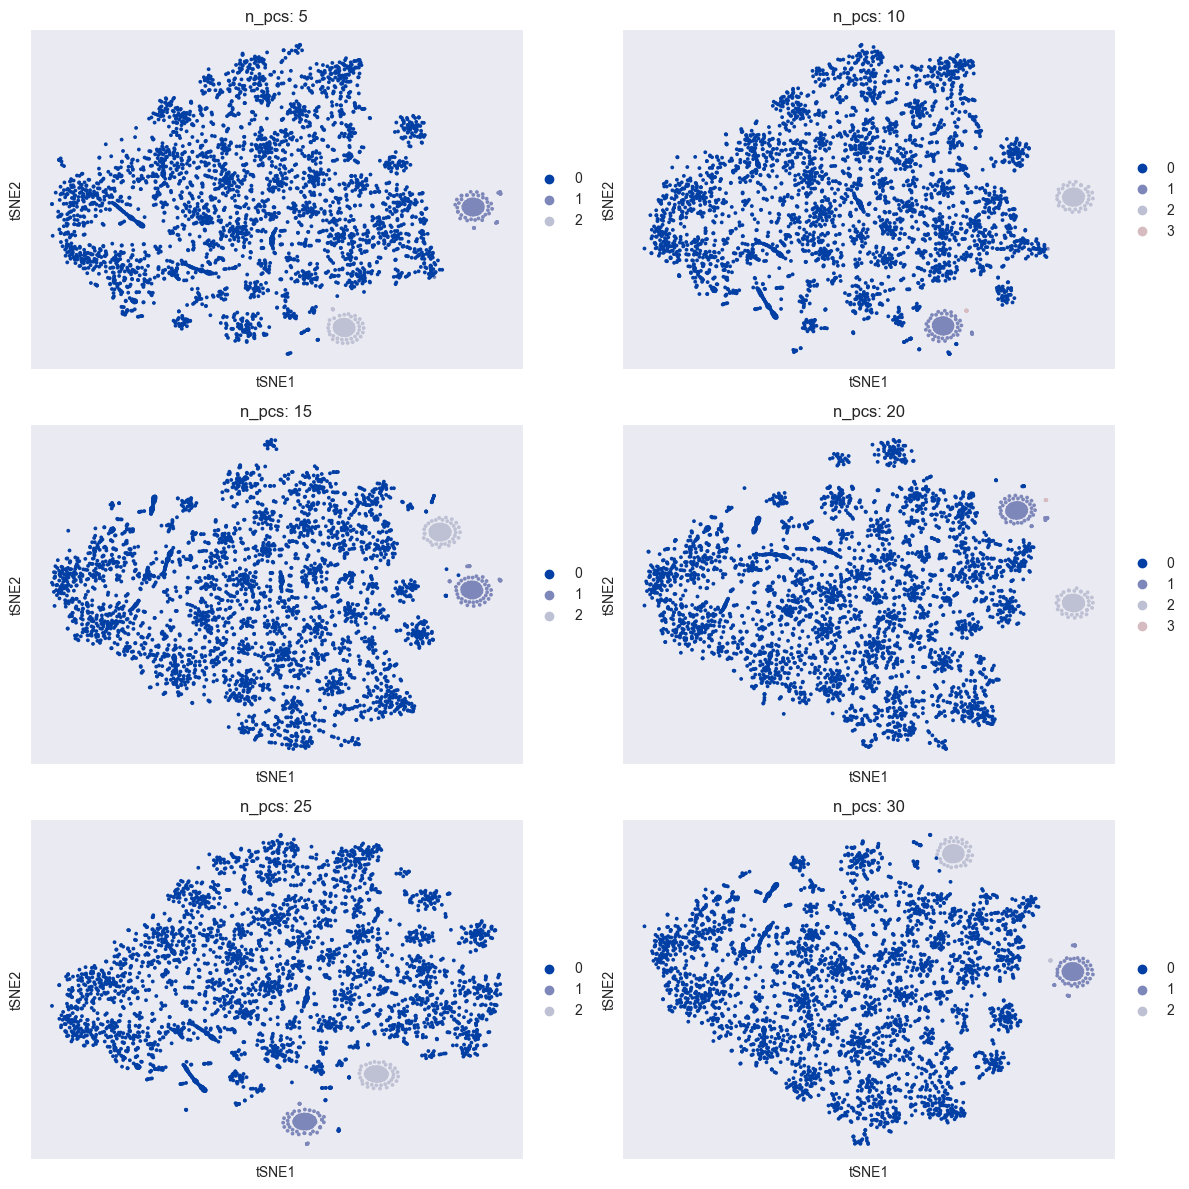

In [5]:
tuning_values = [5, 10, 15, 20, 25, 30]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.apply_tsne(all_noise, n_pcs=value)
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"n_pcs: {value}",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

### 1.c. `resolution`

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:46:02,459 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:46:02,460 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 21:46:20,857 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:47:35,555 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:47:35,556 [INFO] openTSNE.tsne: Automa

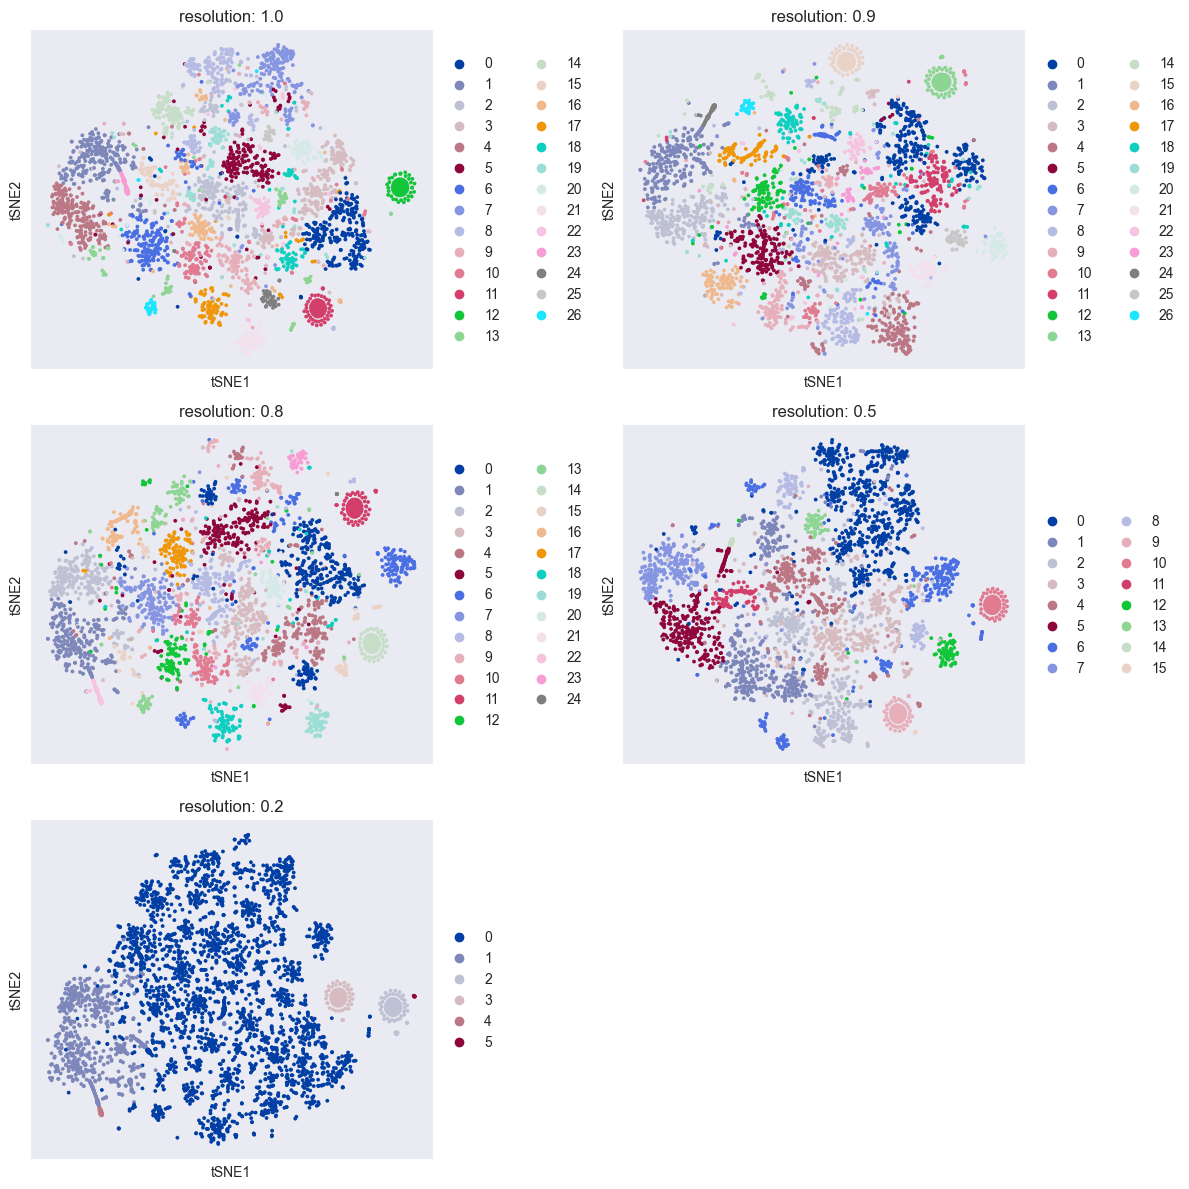

In [6]:
tuning_values = [1.0, 0.9, 0.8, 0.5, 0.2]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.apply_tsne(all_noise, resolution=value)
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"resolution: {value}",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

### 1.d. `resolution` + others

In [ ]:
tuning_values = [0.5, 0.4, 0.3, 0.015]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.apply_tsne(all_noise, n_neighbors=5, n_pcs=10, resolution=value)
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"resolution: {value} (n_neighbors=5, n_pcs=10)",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:53:31,457 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:53:31,459 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
2025-07-27 21:53:46,519 [INFO] openTSNE.tsne: Automatically determined negative gradient method `bh`
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
2025-07-27 21:55:01,121 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-27 21:55:01,123 [INFO] openTSNE.tsne: Automa